In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.externals import joblib
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, f1_score
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Flatten, LSTM, Conv1D, MaxPooling1D, Dropout, Activation
from keras.layers.embeddings import Embedding

/home/james/programs/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
Using TensorFlow backend.


In [3]:
def plot_roc(targets, probs, name=''):
    fpr, tpr, _ = roc_curve(targets, probs)
    auc = roc_auc_score(targets, probs)
    plt.figure(1)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr, label='AUC {:.3f}'.format(auc))
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve {}'.format(name))
    plt.legend(loc='lower right')
    plt.savefig('roc_{}.png'.format(name))

##### Random Forest Classifier with 100 trees

Original Data

In [4]:
# load testing set
random_forest_test = joblib.load('random_forest_original_test.pkl')

In [5]:
# load classifier
forest = joblib.load('RandomForestBalanced_original.pkl')

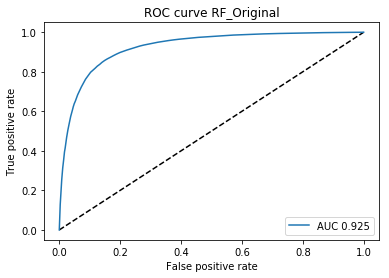

In [6]:
rf_result = forest.predict(list(random_forest_test['question_vector_avg']))
rf_probs = forest.predict_proba(list(random_forest_test['question_vector_avg']))[:, 1]

plot_roc(random_forest_test['target'], rf_probs, 'RF_Original')

In [7]:
print('F1-score = %.6f' % f1_score(random_forest_test['target'], rf_result))

F1-score = 0.850282


Filtered Data

In [8]:
# load testing set
random_forest_test = joblib.load('random_forest_test.pkl')

In [9]:
# load classifier
forest = joblib.load('RandomForestBalanced.pkl')

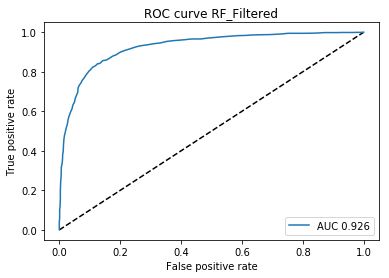

In [10]:
rf_result = forest.predict(list(random_forest_test['question_vector_avg']))
rf_probs = forest.predict_proba(list(random_forest_test['question_vector_avg']))[:, 1]

plot_roc(random_forest_test['target'], rf_probs, 'RF_Filtered')

In [11]:
print('F1-score = %.6f' % f1_score(random_forest_test['target'], rf_result))

F1-score = 0.853503


##### LSTM

Original Data

In [12]:
# load testing set
lstm_train = joblib.load('lstm_original_train.pkl')
lstm_test = joblib.load('lstm_original_test.pkl')

In [13]:
# load classifier
model = joblib.load('LSTMBalanced_original.pkl')

In [14]:
vocab_size = len(set([i for j in list(lstm_train['question_text_clean'])for i in j.split(' ')]))

In [15]:
### Create sequence
vocabulary_size = vocab_size
tokenizer = Tokenizer(num_words= vocab_size)
tokenizer.fit_on_texts(lstm_train['question_text_clean'])

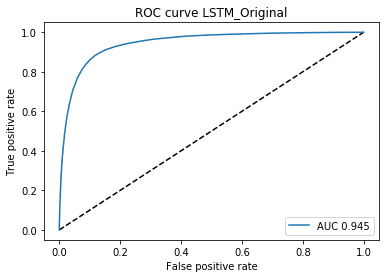

In [16]:
sequences_test = tokenizer.texts_to_sequences(lstm_test['question_text_clean'])
data_test = pad_sequences(sequences_test, maxlen=32)
lstm_result = model.predict_classes(data_test)
lstm_probs = model.predict(data_test).ravel()

plot_roc(lstm_test['target'],lstm_probs,'LSTM_Original')

In [17]:
print('F1-score = %.6f' % f1_score(lstm_test['target'], lstm_result))

F1-score = 0.879341


Filtered Data

In [18]:
# load testing set
lstm_train = joblib.load('lstm_train.pkl')
lstm_test = joblib.load('lstm_test.pkl')

In [19]:
# load classifier
model = joblib.load('LSTMBalanced.pkl')

In [20]:
vocab_size = len(set([i for j in list(lstm_train['question_text_clean'])for i in j.split(' ')]))

In [21]:
### Create sequence
vocabulary_size = vocab_size
tokenizer = Tokenizer(num_words= vocab_size)
tokenizer.fit_on_texts(lstm_train['question_text_clean'])

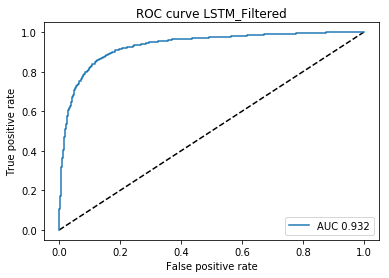

In [22]:
sequences_test = tokenizer.texts_to_sequences(lstm_test['question_text_clean'])
data_test = pad_sequences(sequences_test, maxlen=32)
lstm_result = model.predict_classes(data_test)
lstm_probs = model.predict(data_test).ravel()

plot_roc(lstm_test['target'],lstm_probs,'LSTM_Filtered')

In [23]:
print('F1-score = %.6f' % f1_score(lstm_test['target'], lstm_result))

F1-score = 0.862100
